### `fetch_olivetti_faces` dataset -sklearn.

Creating a face classifier in `skitlearn` using build in datsets.

### Imports

In [24]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

### Checking the datasets available.

In [4]:
dir(datasets)[:2]

['__all__', '__builtins__']

### Loading the Data

In [11]:
faces = datasets.fetch_olivetti_faces()
images = faces['images']
data = faces['data']
targets= faces['target']

### Define a function that plots images

In [18]:
def plot_images(images, cols):
    rows = 3
    fig = plt.figure()
    fig.set_size_inches(cols * 2, rows * 2)
    for i , image in enumerate(images):
        plt.subplot(rows, cols, i + 1)
        plt.axis('off')
        plt.imshow(image, cmap="gray")

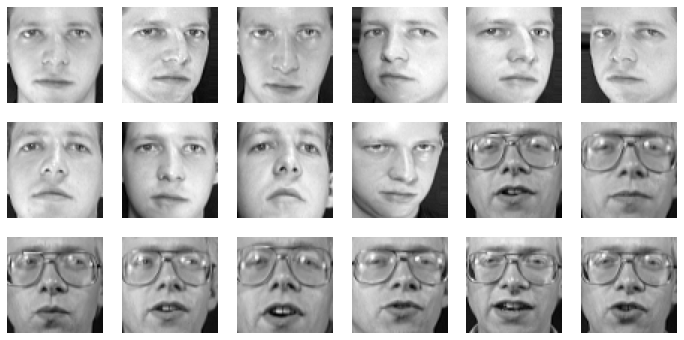

In [19]:
plot_images(images[:18], 6)

In [22]:
images.shape, targets.shape, data.shape

((400, 64, 64), (400,), (400, 4096))

In [25]:
X_train, X_test, y_train, y_test, X_train_images,  X_test_images =  train_test_split(
    data,
    targets,
    images,
    test_size = .2,
    random_state = 42
)

In [26]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_test_images.shape, X_train_images.shape

((320, 4096), (320,), (80, 4096), (80,), (80, 64, 64), (320, 64, 64))

### Creating `Classifier` (`SVC`).

In [29]:
pipe = Pipeline([
    ('clf', SVC())
])
pipe.fit(X_train, y_train)

Pipeline(steps=[('clf', SVC())])

### Scoring the model - `evaluating` the classifier

In [30]:
pipe.score(X_test, y_test)

0.925

In [31]:
pipe.score(X_train, y_train)

0.99375

> We are getting `~93%` accuracy on teh test examples and `~99%`  accuracy on the train example.

### Making predictions using our `classifier`.

In [32]:
predictions = pipe.predict(X_test)
predictions

array([20, 28,  3, 21,  9,  8, 32,  9, 26, 12,  0, 36,  5,  7, 13,  4, 27,
       37, 23, 38,  7,  1,  4, 27,  0, 39, 11, 22, 26, 10,  8, 19, 26,  5,
       23, 11, 11, 20, 15, 14, 38,  5,  7,  2,  8, 38, 14, 18,  2, 17,  4,
       32, 33,  7, 37, 22, 22, 17,  3, 15, 12, 29, 25,  0, 10,  3, 35, 26,
       37,  7, 32, 14,  0,  4, 38, 24, 22, 36, 17, 28])

### Plotting correct labels, images and with respective predictions.

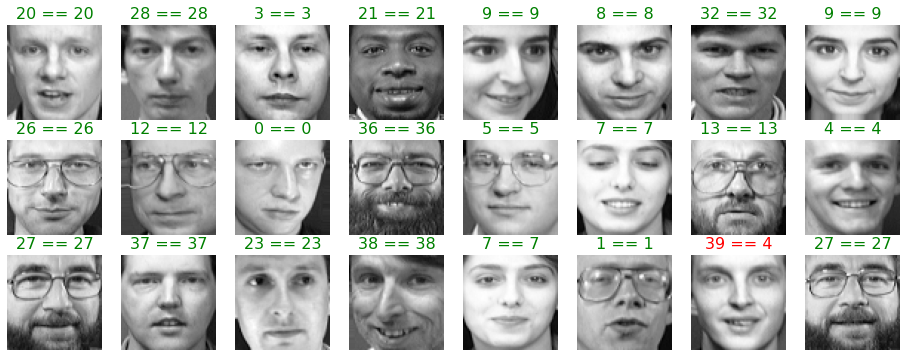

In [33]:
def plot_predictions_images(images_and_classes, labels_true, labels_pred, cols=5):
    rows = 3
    fig = plt.figure()
    fig.set_size_inches(cols * 2, rows * 2)
    for i, (image, label_true, label_pred) in enumerate(zip(images_and_classes, labels_true.astype("int32"), labels_pred)):
        plt.subplot(rows, cols, i + 1)
        plt.axis('off')
        plt.imshow(image, cmap="gray")
        plt.title(f"{label_true} == {label_pred}", color ='g' if label_true == label_pred else 'r', fontsize=16 )

plot_predictions_images(X_test_images[:24], y_test[:24], predictions[:24], cols=8)

> The model is classifying faces correctly, It only misses label `39` which it predict as label `4`.

### Confusion matrix.

In [41]:
print(confusion_matrix(y_test, predictions))

[[3 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 1 0 1]]
